In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-28.33530416881733 129.79895826934637
29.107328377637657 -163.2965524188033
-29.54706407285918 100.03955058058
13.38351141241165 74.99218642410406
-57.490284266443055 86.85117501240745
-34.76789095269235 70.33396582916836
-59.861757877896395 42.382311528328444
-59.020583764393585 -29.602283577465386
-73.27798294407205 21.43780635099168
-31.64942831691814 157.34854442959914
65.65445597071962 -56.39728983232483
75.14719205602651 47.76331140798416
-45.21274764867812 5.122114784610915
-45.09785945271457 107.60571079330833
17.047238233439487 -52.993367821689034
-74.56664008421116 -177.20867678638055
-7.842499797554353 65.57663272709439
-5.574992498677972 176.50080203482867
-41.88096770264506 153.26941906479135
55.589919458801916 179.16520303125588
-15.569570408546113 -38.57055911032441
-4.435505677916325 -69.88075793082739
39.46808642909389 32.48499241439609
-20.04549352633734 -167.27092307389034
-36.275079071494105 -40.992702528682315
23.529364600487455 84.23484283655176
-21.66067528515579

60.503195700306094 -34.106152851736
-10.88487984095299 -30.75568877571078
-32.97416133624296 -88.69449959194006
-79.41207276109877 -107.08058673173315
-18.301438702960127 87.22938416281306
-41.59515813206516 -116.76558741952127
-35.2596520230821 -39.388259289705644
24.17268927010028 -119.71569989798583
-34.53942702452619 -139.16323354917628
-38.96470234069918 64.21796677919812
-75.48183085436935 52.868354030432954
52.306841739243225 -81.41492733425525
-7.63211120079869 63.63392102571942
6.580521033910941 113.91507667075109
87.97273386234127 -11.769440987054594
-23.731067377999594 164.18288989724402
10.348651424778907 32.141559309451054
-67.56277340211099 -84.09162742315205
-60.9801671326901 -146.2545746141394
52.74892675238709 -70.89620645497342
-81.12153668073282 -177.0616172780972
-6.883110865782982 -73.23537443287987
-39.64625577159442 82.4302499418269
73.47263555558865 119.71018130654596
-11.67804799308243 24.727815297034596
-3.9962964902472464 -126.04248207295274
-18.1067387710065

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yulara
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | someshwar
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | sawtell
Processing Record 11 of Set 1 | sisimiut
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | lolua
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | beringovskiy
Processing Record 20 of Set 1 | canavieiras
Processing Record 21 of Set 1 | benjamin constant
Processing Record

Processing Record 37 of Set 4 | bengkulu
Processing Record 38 of Set 4 | rawa mazowiecka
Processing Record 39 of Set 4 | leningradskiy
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | makakilo city
Processing Record 42 of Set 4 | provideniya
Processing Record 43 of Set 4 | luderitz
Processing Record 44 of Set 4 | bloomington
Processing Record 45 of Set 4 | estevan
Processing Record 46 of Set 4 | pravda
Processing Record 47 of Set 4 | esperance
Processing Record 48 of Set 4 | antanifotsy
Processing Record 49 of Set 4 | roald
Processing Record 50 of Set 4 | grand gaube
Processing Record 1 of Set 5 | amderma
City not found. Skipping...
Processing Record 2 of Set 5 | mingshui
Processing Record 3 of Set 5 | portree
Processing Record 4 of Set 5 | lazaro cardenas
Processing Record 5 of Set 5 | coro
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | el balyana
City not found. Skipping...
Processing Record 8 of Set

Processing Record 28 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 29 of Set 8 | lodja
Processing Record 30 of Set 8 | sekoma
Processing Record 31 of Set 8 | cheremkhovo
Processing Record 32 of Set 8 | tarudant
City not found. Skipping...
Processing Record 33 of Set 8 | santa maria del oro
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | north bend
Processing Record 36 of Set 8 | sudak
Processing Record 37 of Set 8 | pangnirtung
Processing Record 38 of Set 8 | batticaloa
Processing Record 39 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 8 | dudinka
Processing Record 41 of Set 8 | alta floresta
Processing Record 42 of Set 8 | kununurra
Processing Record 43 of Set 8 | kysyl-syr
Processing Record 44 of Set 8 | victoria
Processing Record 45 of Set 8 | kahului
Processing Record 46 of Set 8 | meulaboh
Processing Record 47 of Set 8 | dingle
Processing Record 48 of Set 8 | jumilla
Processing Record 49 of

Processing Record 17 of Set 12 | salekhard
Processing Record 18 of Set 12 | bafq
Processing Record 19 of Set 12 | fernandina beach
Processing Record 20 of Set 12 | bataipora
Processing Record 21 of Set 12 | micheweni
Processing Record 22 of Set 12 | caravelas
Processing Record 23 of Set 12 | college
Processing Record 24 of Set 12 | bathurst
Processing Record 25 of Set 12 | dmitriyev-lgovskiy
City not found. Skipping...
Processing Record 26 of Set 12 | kuito
Processing Record 27 of Set 12 | araguatins
City not found. Skipping...
Processing Record 28 of Set 12 | cayenne
Processing Record 29 of Set 12 | goderich
Processing Record 30 of Set 12 | butembo
Processing Record 31 of Set 12 | nelson bay
Processing Record 32 of Set 12 | mentok
City not found. Skipping...
Processing Record 33 of Set 12 | ocampo
Processing Record 34 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 35 of Set 12 | sorland
Processing Record 36 of Set 12 | acapulco
Processing Record 37 of Set 12 | taoudenni
Proce

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yulara,-25.2406,130.9889,59.09,46,67,23.26,AU,2022-09-26 22:36:34
1,Kapaa,22.0752,-159.3190,84.52,66,0,10.36,US,2022-09-26 22:36:34
2,Carnarvon,-24.8667,113.6333,64.74,33,1,15.32,AU,2022-09-26 22:36:35
3,Someshwar,13.5000,75.0667,72.32,94,100,1.83,IN,2022-09-26 22:36:35
4,Busselton,-33.6500,115.3333,50.81,87,2,5.84,AU,2022-09-26 22:36:36
5,Mahebourg,-20.4081,57.7000,71.89,64,40,11.50,MU,2022-09-26 22:36:36
6,Port Alfred,-33.5906,26.8910,62.19,91,100,8.99,ZA,2022-09-26 22:36:37
7,Chuy,-33.6971,-53.4616,57.70,93,12,4.21,UY,2022-09-26 22:36:37
8,Bredasdorp,-34.5322,20.0403,52.74,91,56,4.72,ZA,2022-09-26 22:36:38
9,Sawtell,-30.3833,153.1000,66.22,77,40,4.61,AU,2022-09-26 22:36:38


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yulara,AU,2022-09-26 22:36:34,-25.2406,130.9889,59.09,46,67,23.26
1,Kapaa,US,2022-09-26 22:36:34,22.0752,-159.3190,84.52,66,0,10.36
2,Carnarvon,AU,2022-09-26 22:36:35,-24.8667,113.6333,64.74,33,1,15.32
3,Someshwar,IN,2022-09-26 22:36:35,13.5000,75.0667,72.32,94,100,1.83
4,Busselton,AU,2022-09-26 22:36:36,-33.6500,115.3333,50.81,87,2,5.84
...,...,...,...,...,...,...,...,...,...
551,Ixtapa,MX,2022-09-26 22:52:52,20.7000,-105.2000,87.22,79,50,1.99
552,Mahanoro,MG,2022-09-26 22:52:53,-19.9000,48.8000,65.44,87,12,3.11
553,Zapolyarnyy,RU,2022-09-26 22:52:53,69.4154,30.8136,40.28,85,99,4.59
554,Coahuayana,MX,2022-09-26 22:52:53,18.7333,-103.6833,84.99,77,70,4.70


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

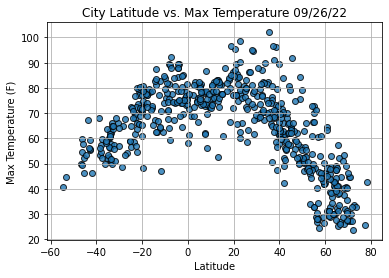

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

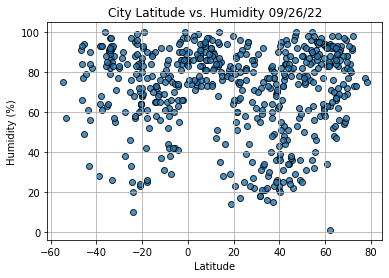

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

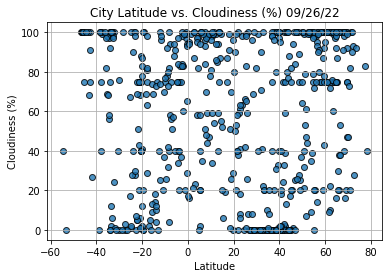

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

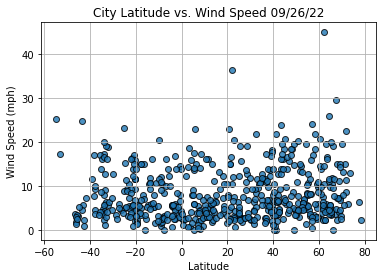

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()